In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
data=pd.read_csv("fraudTest.csv.zip")

In [13]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [14]:
data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [15]:
df=data.drop(columns=['first','last','trans_date_trans_time','dob','unix_time','city_pop','lat','long'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  555719 non-null  int64  
 1   cc_num      555719 non-null  int64  
 2   merchant    555719 non-null  object 
 3   category    555719 non-null  object 
 4   amt         555719 non-null  float64
 5   gender      555719 non-null  object 
 6   street      555719 non-null  object 
 7   city        555719 non-null  object 
 8   state       555719 non-null  object 
 9   zip         555719 non-null  int64  
 10  job         555719 non-null  object 
 11  trans_num   555719 non-null  object 
 12  merch_lat   555719 non-null  float64
 13  merch_long  555719 non-null  float64
 14  is_fraud    555719 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 63.6+ MB


In [17]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,66.679297,-66.952026,1.000000


In [18]:
df.dtypes

Unnamed: 0      int64
cc_num          int64
merchant       object
category       object
amt           float64
gender         object
street         object
city           object
state          object
zip             int64
job            object
trans_num      object
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['merchant', 'category', 'gender', 'street', 'city', 'state', 'job','trans_num']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))  
print(df.dtypes)

Unnamed: 0      int64
cc_num          int64
merchant        int64
category        int64
amt           float64
gender          int64
street          int64
city            int64
state           int64
zip             int64
job             int64
trans_num       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  555719 non-null  int64  
 1   cc_num      555719 non-null  int64  
 2   merchant    555719 non-null  int64  
 3   category    555719 non-null  int64  
 4   amt         555719 non-null  float64
 5   gender      555719 non-null  int64  
 6   street      555719 non-null  int64  
 7   city        555719 non-null  int64  
 8   state       555719 non-null  int64  
 9   zip         555719 non-null  int64  
 10  job         555719 non-null  int64  
 11  trans_num   555719 non-null  int64  
 12  merch_lat   555719 non-null  float64
 13  merch_long  555719 non-null  float64
 14  is_fraud    555719 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 63.6 MB


In [21]:
X = df.drop(columns=['is_fraud'])  
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

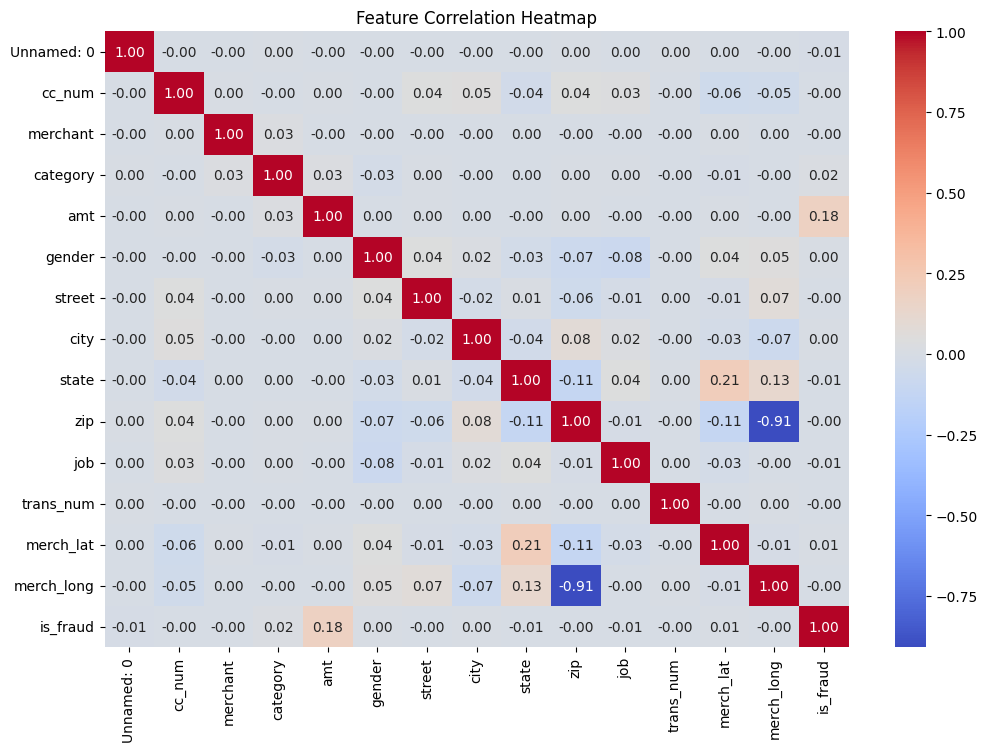

In [22]:
import seaborn as sns
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [26]:
X = df.drop(columns=['is_fraud'])  
y = df['is_fraud']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9961671345281796


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
log_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

Confusion Matrix:
[[110718      0]
 [   426      0]]

AUC-ROC Score: 0.5420336163430726


In [32]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       1.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       1.00      0.50      0.50    111144
weighted avg       1.00      1.00      0.99    111144

